Author:
        
        PARK, JunHo, junho@ccnets.org

        Kim, Jinsu 

        KIM, JeongYoong, jeongyoong@ccnets.org
        
    COPYRIGHT (c) 2024. CCNets. All Rights reserved.

# Sparse Drug Composition Prediction from NIR Dataset Using CCNet

## Objective
Predict the composition of drug batches from Near-Infrared (NIR) spectra using Causal Cooperative Network (CCNet). The dataset consists of a few types of compositions due to the high cost of producing drug batches, despite each NIR spectrum being labeled.

## Background
In pharmaceutical analysis, obtaining drug compositions is expensive and time-consuming, resulting in only a few types of labeled compositions. However, NIR spectra, which correspond to these compositions, can be collected in large quantities. This situation creates a challenge where the labeled data points only cover a few compositions.

## Challenges
1. **Few Composition Types**: The dataset contains NIR spectra corresponding to only a few compositions of 6 different components.
2. **Overfitting**: High risk of overfitting due to the limited variety of labeled compositions.
3. **Cost and Practicality**: Producing more types of compositions is costly and impractical.

## Why Supervised Learning is Not Appropriate
- **Generalization**: Supervised models require a diverse range of labeled compositions to generalize well.
- **Data Imbalance**: Supervised learning struggles with the imbalance between the limited composition types and the numerous data points.
- **Overfitting**: High risk due to the limited number of composition types.
- **Memorization**: Supervised models tend to memorize the few available compositions, making it difficult to predict a continuous range of compositions (spectrum).

## Proposed Solution
Utilize the Causal Cooperative Network (CCNet) to effectively leverage the labeled NIR data. CCNet does not directly predict compositions; instead, it learns to recreate the original data from its predictions by capturing causal relationships. This method enables the model to generalize better and produce accurate reconstructions of drug compositions.

This approach addresses the limitations of traditional supervised learning by maximizing the use of the labeled data and enhancing the model's ability to generalize from limited composition types.

In [1]:
import sys
import os
path_append = "../../"
sys.path.append(path_append)  # Go up one directory from where you are.

In [2]:
import pandas as pd
import seaborn as sns
from plotly import express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler


- A total of 31 samples (mixtures) were prepared, and NIR spectra were obtained from 100 different positions of the same sample. The raw materials used also had NIR spectra obtained from 100 different positions.

- Generally, preprocessing steps are applied to NIR spectra when developing predictive models.

- We will compare three types of predictive models: the one developed by us (with preprocessing performed), and two developed through artificial intelligence (one with raw data and the other with preprocessed data).

- Therefore, predictions need to be made using both raw and preprocessed data.

- The "Torque" sheet summarizes the Torque values acquired during the mixing process of the mixtures, representing Torque values over time (s).

- The A, B, C, D, E, F in the Raw and Preprocessing spectrum sheets are not mixtures, hence they do not have Torque values.

- The "Raw Spectrum" sheet and the "Preprocessing Spectrum" sheet contain the NIR spectra of the mixtures and raw materials.

- The data in the "Raw Spectrum" sheet are unprocessed raw data.

- The "Preprocessing Spectrum" data are raw data that have been preprocessed to reduce noise occurring during the data acquisition process.

- To increase the data volume, the NIR spectrum of the same sample was measured 100 times at different positions.

# Torque

In [3]:
# 1. The values of C, D, E, and F are fixed, only the values of A and B change.
# 2. Since it is described as Torque values over time (s), the cells are assumed to be Torque values.
# 3. The labels are the ratios of A, B, C, D, E, and F.

torque = pd.read_excel(path_append + "../data/drug manufacturing/drug.xlsx", sheet_name="Torque")
torque.columns = torque.columns[:7].tolist()+torque.iloc[0,7:].values.tolist()
torque = torque.iloc[1:].reset_index(drop=True)
torque

,Sameple name,A(%),B(%),C(%),D(%),E(%),F(%),0.0,0.005,0.01,...,162.2,162.205,162.21,162.215,162.22,162.225,162.23,162.235,162.24,162.245
0,Run 1,2.43040,61.81960,31.5,2.25,1.0,1.0,0.327,0.320,0.320,...,0.332,0.325,0.326,0.326,0.330,0.330,0.326,0.326,0.324,0.328
1,Run 2,2.49984,61.75016,31.5,2.25,1.0,1.0,0.321,0.322,0.321,...,0.317,0.320,0.313,0.326,0.316,0.324,0.319,0.319,0.322,0.318
2,Run 3,2.56928,61.68072,31.5,2.25,1.0,1.0,0.316,0.318,0.311,...,0.321,0.323,0.316,0.326,0.316,0.319,0.322,0.318,0.323,0.315
3,Run 4,2.63872,61.61128,31.5,2.25,1.0,1.0,0.315,0.320,0.326,...,0.322,0.325,0.318,0.322,0.317,0.324,0.317,0.322,0.324,0.323
4,Run 5,2.70816,61.54184,31.5,2.25,1.0,1.0,0.311,0.320,0.316,...,0.326,0.322,0.325,0.330,0.325,0.317,0.325,0.327,0.322,0.323
5,Run 6,2.77760,61.47240,31.5,2.25,1.0,1.0,0.321,0.313,0.317,...,0.318,0.322,0.318,0.319,0.319,0.319,0.319,0.321,0.314,0.324
6,Run 7,2.84704,61.40296,31.5,2.25,1.0,1.0,0.314,0.311,0.313,...,0.317,0.317,0.319,0.317,0.317,0.318,0.318,0.315,0.318,0.320
7,Run 8,2.91648,61.33352,31.5,2.25,1.0,1.0,0.322,0.317,0.320,...,0.333,0.324,0.326,0.322,0.328,0.324,0.324,0.323,0.323,0.325
8,Run 9,2.98592,61.26408,31.5,2.25,1.0,1.0,0.320,0.314,0.322,...,0.330,0.326,0.322,0.326,0.322,0.328,0.323,0.328,0.327,0.324
9,Run 10,3.05536,61.19464,31.5,2.25,1.0,1.0,0.319,0.321,0.319,...,0.322,0.319,0.329,0.319,0.326,0.321,0.326,0.329,0.321,0.325


# Visualizeation

In [4]:
# The rate of change in the raw materials doubles at the 15th point

diff = (torque.iloc[1,1] - torque.iloc[0,1]).round(5)
print("normal_diff: ", diff)
for i in range(2, len(torque)):
    now_diff = (torque.iloc[i,1] - torque.iloc[i-1,1]).round(5)
    if diff!=now_diff:
        print(f"abnormal_diff idx: {i}, val: {now_diff}")

fig = px.line(torque.iloc[:,1])
fig.update_layout(width=700, height=500, title=go.layout.Title(text="Source Value"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="A value")
fig.show()

normal_diff:  0.06944
abnormal_diff idx: 15, val: 0.13888
abnormal_diff idx: 30, val: -1.0416


In [5]:
# There is a section where Time jumps abruptly.
# 4.995 -> 92.25
# 102.245 -> 122.25
# 132.245 -> 152.25
torque_col_diff = pd.Series(torque.columns[7:]).diff().fillna(0.005)
print(f"normal_time_diff: {torque_col_diff.iloc[1]}")
for i in range(1, len(torque.columns[7:])):
    if torque_col_diff[i].round(3)!=torque_col_diff[0]:
        print(f"abnormal_time_diff idx: {i}, {torque.columns[7+i-1]} -> {torque.columns[7+i]}")
fig = px.line(torque.columns[7:])
fig.update_layout(width=800, height=500, title=go.layout.Title(text="Graph Torque - Time"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Time")
fig.show()

normal_time_diff: 0.005
abnormal_time_diff idx: 1000, 4.995 -> 92.25
abnormal_time_diff idx: 3000, 102.245 -> 122.25
abnormal_time_diff idx: 5000, 132.245 -> 152.25


C:\Users\ccnets-team\AppData\Local\Temp\ipykernel_2932\148503418.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: title={'center': 'Run 1'}, xlabel='Time', ylabel='Torque'>

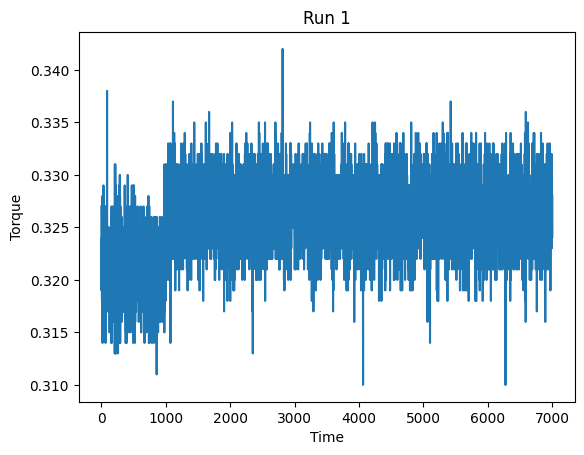

In [6]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 1")
sns.lineplot(data = torque.iloc[0,7:].values)

<Axes: title={'center': 'Run 2'}, xlabel='Time', ylabel='Torque'>

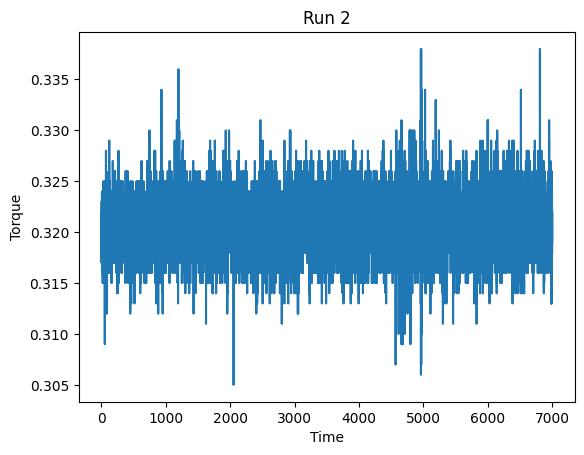

In [7]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 2")
sns.lineplot(data = torque.iloc[1,7:].values)

<Axes: title={'center': 'Run 3'}, xlabel='Time', ylabel='Torque'>

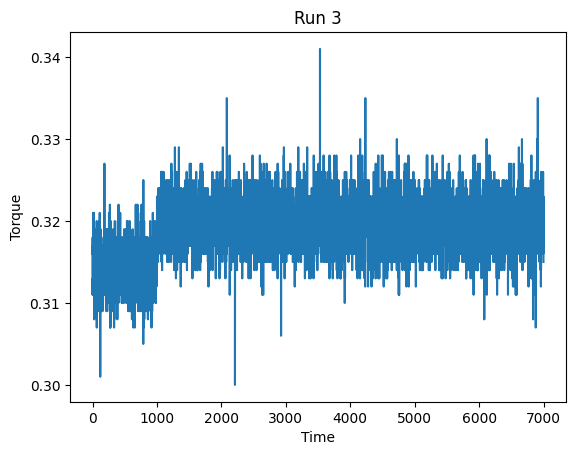

In [8]:
plt.xlabel("Time")
plt.ylabel("Torque")
plt.title("Run 3")
sns.lineplot(data = torque.iloc[2,7:].values)

# RAW

In [9]:
# For each mixture and 100% raw material, measurements were taken 100 times. -> (31 + 6) * 100 = 3700
raw = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Raw Spectrum")
raw = raw.set_index("Sample name")
raw.columns = raw.columns[:6].tolist()+raw.iloc[0,6:].values.tolist()
raw = raw.iloc[1:]
raw

,A(%),B(%),C(%),D(%),E(%),F(%),4736.824121,4744.538818,4752.253516,4759.968213,...,5932.602197,5940.316895,5948.031592,5955.746289,5963.460986,5971.175684,5978.890381,5986.605078,5994.319775,6002.034473
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,2.4304,61.8196,31.5,2.25,1.0,1.0,0.595625,0.594963,0.593775,0.592429,...,0.290442,0.289701,0.289275,0.288955,0.288600,0.287968,0.287336,0.287404,0.288196,0.288837
Run01_2,2.4304,61.8196,31.5,2.25,1.0,1.0,0.666036,0.665710,0.664952,0.663161,...,0.341719,0.341113,0.340717,0.340311,0.339871,0.339152,0.338558,0.338827,0.339851,0.340655
Run01_3,2.4304,61.8196,31.5,2.25,1.0,1.0,0.476241,0.476290,0.475239,0.473548,...,0.200643,0.200053,0.199585,0.199125,0.198731,0.198239,0.197761,0.197833,0.198601,0.199246
Run01_4,2.4304,61.8196,31.5,2.25,1.0,1.0,0.668882,0.668593,0.667606,0.665640,...,0.353836,0.353068,0.352462,0.351932,0.351410,0.350691,0.350131,0.350335,0.351205,0.351855
Run01_5,2.4304,61.8196,31.5,2.25,1.0,1.0,0.631540,0.631593,0.630481,0.628587,...,0.312428,0.311782,0.311314,0.310829,0.310340,0.309671,0.309045,0.309068,0.309870,0.310664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.0000,0.0000,0.0,0.00,0.0,100.0,0.137963,0.141466,0.143618,0.143244,...,0.102847,0.103975,0.105095,0.105961,0.106088,0.105196,0.103523,0.101359,0.099198,0.097825
F_97,0.0000,0.0000,0.0,0.00,0.0,100.0,0.411240,0.408607,0.405413,0.402167,...,0.306883,0.305356,0.303475,0.301621,0.299818,0.297955,0.296220,0.294596,0.292937,0.291349
F_98,0.0000,0.0000,0.0,0.00,0.0,100.0,0.340023,0.334706,0.328719,0.323118,...,0.240007,0.237060,0.234011,0.231140,0.228248,0.225024,0.221586,0.218268,0.215288,0.212641


# Preprocessed

In [10]:
# Preprocessed raw
prep = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Preprocessing Spectrum")
prep = prep.set_index("Sample name")
prep.columns = prep.columns[:7].tolist()+prep.iloc[0,7:].values.tolist()
prep = prep.iloc[1:]
prep

,A(%),B(%),C(%),D(%),E(%),F(%),Wavenumber (1/cm),4744.538818,4752.253516,4759.968213,...,5932.602197,5940.316895,5948.031592,5955.746289,5963.460986,5971.175684,5978.890381,5986.605078,5994.319775,6002.034473
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,2.4304,61.8196,31.5,2.25,1.0,1.0,-1.737890,-1.738660,-1.740170,-1.740970,...,-1.764540,-1.764440,-1.764890,-1.762430,-1.761680,-1.764170,-1.765620,-1.765160,-1.765700,-1.768440
Run01_2,2.4304,61.8196,31.5,2.25,1.0,1.0,-2.315620,-2.315560,-2.316030,-2.316110,...,-2.284550,-2.282840,-2.284700,-2.283750,-2.280370,-2.279220,-2.281130,-2.283550,-2.285030,-2.286570
Run01_3,2.4304,61.8196,31.5,2.25,1.0,1.0,-3.512990,-3.513140,-3.513890,-3.513950,...,-3.462560,-3.462320,-3.465950,-3.465820,-3.461660,-3.460640,-3.462750,-3.464210,-3.464370,-3.465390
Run01_4,2.4304,61.8196,31.5,2.25,1.0,1.0,-4.082130,-4.081020,-4.079980,-4.078820,...,-3.924270,-3.923430,-3.926870,-3.925730,-3.919940,-3.918770,-3.920510,-3.921500,-3.921660,-3.921180
Run01_5,2.4304,61.8196,31.5,2.25,1.0,1.0,-2.933300,-2.932420,-2.931360,-2.930910,...,-2.790960,-2.789480,-2.792380,-2.792930,-2.788410,-2.786580,-2.787300,-2.787390,-2.785750,-2.784070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.0000,0.0000,0.0,0.00,0.0,100.0,-0.001330,0.001720,0.002319,0.003884,...,0.172153,0.176713,0.179713,0.178604,0.177173,0.179134,0.180011,0.179403,0.180363,0.182755
F_97,0.0000,0.0000,0.0,0.00,0.0,100.0,0.603917,0.607446,0.608513,0.611066,...,0.782482,0.784989,0.789657,0.790892,0.788208,0.787101,0.789185,0.791486,0.792805,0.794250
F_98,0.0000,0.0000,0.0,0.00,0.0,100.0,0.954953,0.956262,0.956334,0.957919,...,0.986205,0.984892,0.986516,0.989677,0.988423,0.985180,0.984939,0.986336,0.988259,0.989158


# Preprocessing

## 1) raw

In [11]:
raw = pd.read_excel("../../data/drug manufacturing/drug.xlsx", sheet_name="Raw Spectrum")
# Delete sample name
raw = raw.set_index("Sample name")
raw.columns = raw.columns[:6].tolist()+raw.iloc[0,6:].values.tolist()
raw = raw.iloc[1:]

# label ratio 0~1
raw.iloc[:, :6]/=100
mm = MinMaxScaler()
raw.iloc[6:] = mm.fit_transform(raw.iloc[6:].values)
    
raw

,A(%),B(%),C(%),D(%),E(%),F(%),4736.824121,4744.538818,4752.253516,4759.968213,...,5932.602197,5940.316895,5948.031592,5955.746289,5963.460986,5971.175684,5978.890381,5986.605078,5994.319775,6002.034473
Sample name,,,,,,,,,,,,,,,,,,,,,
Run01_1,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.595625,0.594963,0.593775,0.592429,...,0.290442,0.289701,0.289275,0.288955,0.288600,0.287968,0.287336,0.287404,0.288196,0.288837
Run01_2,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.666036,0.665710,0.664952,0.663161,...,0.341719,0.341113,0.340717,0.340311,0.339871,0.339152,0.338558,0.338827,0.339851,0.340655
Run01_3,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.476241,0.476290,0.475239,0.473548,...,0.200643,0.200053,0.199585,0.199125,0.198731,0.198239,0.197761,0.197833,0.198601,0.199246
Run01_4,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.668882,0.668593,0.667606,0.665640,...,0.353836,0.353068,0.352462,0.351932,0.351410,0.350691,0.350131,0.350335,0.351205,0.351855
Run01_5,0.024304,0.618196,0.315,0.0225,0.01,0.01,0.631540,0.631593,0.630481,0.628587,...,0.312428,0.311782,0.311314,0.310829,0.310340,0.309671,0.309045,0.309068,0.309870,0.310664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_96,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.240117,0.245025,0.248597,0.249122,...,0.320803,0.326225,0.330968,0.334839,0.337300,0.338098,0.337526,0.335942,0.332448,0.329165
F_97,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.519379,0.518813,0.518102,0.516912,...,0.623924,0.624877,0.624967,0.624731,0.624259,0.623597,0.623035,0.622439,0.618555,0.613474
F_98,0.000000,0.000000,0.000,0.0000,0.00,1.00,0.446603,0.443073,0.439149,0.435156,...,0.524571,0.523593,0.522022,0.520307,0.518247,0.515578,0.512454,0.509273,0.503887,0.497843


In [12]:
fig = go.Figure()
fig.update_layout(width=1000, height=500, title=go.layout.Title(text="Graph by Run"), title_x=0.5, title_font_size = 25)
fig.update_xaxes(title_text="Wavenumber (1/cm)")
fig.update_yaxes(title_text="Value")
for i in range(3):
    fig.add_trace(go.Scatter(x=raw.iloc[i,6:].index, y=raw.iloc[i,6:].values, name=raw.index[i]))
fig.show()

# Conclusion

- Data Overview:
    1) Torque: The Torque values of compounds over time.
        ● Shape: 31, 7007 (6+7001)
        ● Categorical Columns: None.
        ● Numerical Columns: 
        ● Labels: Ratios of A, B, C, D, E, F.
        
        ● ※ Likely not necessary for use in training.

    2) Raw: The original detection values of compounds based on wavelength.
        ● Shape: 3700 ((31+6)*100), 171
        ● Categorical Columns: None.
        ● Numerical Columns: 
        ● Labels: Ratios of A, B, C, D, E, F.

    3) Prep: The preprocessed version of the raw file.
        ● Same as raw.

- Special Notes:
    1) Torque:
        ● The rate of change in the ratio of raw materials doubles midway.
        ● There is a section where Time increases consistently and then changes abruptly.

    2) Raw & Prep:
        ● In the graph, raw retains the characteristics of the existing mixture, but it is questionable whether prep retains these features.

- Preprocessing:
    1) Labels: Divide the 6 labels by 100 so that their sum equals 1.
    2) X Normalization: Perform Min-Max normalization on all X values.

- Options:
    1) Feature Selection:
        ● Variance Threshold: Select features with variance above a certain threshold. 
                              Using only X.
                              27 features are selected when the threshold is 0.025.
        ● Recursive Feature Elimination: Use the feature importance calculated by the ML model itself to remove the least important features.
        ● Forward Selection: Start the search with an empty feature subset. 
                            Add one feature at a time to the feature subset through cross-validation to find the feature that shows the best performance at each step.
                            Takes a long time if there are many features.
    
    2) Distribution Change:
        ● Normalize to Gaussian Distribution.
        ● Normalize to Uniform Distribution.

    3) Feature Engineering - Dimensionality Reduction:
        ● Principal Component Analysis (PCA): Classify the document into one of the K topics specified by the user.
        ● Linear Discriminant Analysis (LDA): Find the principal components that maximize the variance of the dataset and use them.


# DataLoader


In [13]:
import torch
from sklearn.model_selection import train_test_split 

In [14]:

# https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_7_DeepLearning/FeedForwardNeuralNetworks.html
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        vals = torch.tensor(self.x[index], dtype = torch.float32)
        label = torch.tensor(self.y[index], dtype= torch.float32)
        # label = torch.tensor(self.y[index], dtype= torch.float32).unsqueeze(-1)
        return vals, label


In [15]:
y = raw.iloc[:,:6]
X = raw.iloc[:,6:]

In [16]:
import numpy as np
# total length of the data
total_length = 3700
mixture_length = 3700

# generate test indices
test_indices = np.hstack([np.arange(start, start+100) for start in range(0, mixture_length, 400)])

# generate all indices
all_indices = np.arange(total_length)

# get train indices by finding the difference between all indices and test indices
train_indices = np.setdiff1d(all_indices, test_indices)

# separate your data into training and testing based on the indices
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]


print("----------------------------X_train, X_test SHAPE----------------------------")
print(X_train.shape, X_test.shape)
print("----------------------------y_train_oversampled, y_train, y_test DISTRIBUTION----------------------------")
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)    

----------------------------X_train, X_test SHAPE----------------------------
(2700, 165) (1000, 165)
----------------------------y_train_oversampled, y_train, y_test DISTRIBUTION----------------------------
A(%)      B(%)      C(%)   D(%)    E(%)  F(%)
0.000000  0.000000  0.000  0.0000  1.00  0.00    3.703704
                           1.0000  0.00  0.00    3.703704
0.045136  0.597364  0.315  0.0225  0.01  0.01    3.703704
0.043747  0.598753  0.315  0.0225  0.01  0.01    3.703704
0.043053  0.599447  0.315  0.0225  0.01  0.01    3.703704
0.042358  0.600142  0.315  0.0225  0.01  0.01    3.703704
0.040970  0.601530  0.315  0.0225  0.01  0.01    3.703704
0.040275  0.602225  0.315  0.0225  0.01  0.01    3.703704
0.039581  0.602919  0.315  0.0225  0.01  0.01    3.703704
0.038192  0.604308  0.315  0.0225  0.01  0.01    3.703704
0.037498  0.605002  0.315  0.0225  0.01  0.01    3.703704
0.036803  0.605697  0.315  0.0225  0.01  0.01    3.703704
0.035414  0.607086  0.315  0.0225  0.01  0.01    3

In [17]:
X_train = X_train.iloc[:, :].values 
X_test = X_test.iloc[:, :].values 
y_train = y_train.values
y_test = y_test.values

# Generate trainset, testset, train_generator, tsest_generator
trainset = Dataset(X_train, y_train)
testset = Dataset(X_test, y_test)

# Training

In [18]:
from tools.setting.data_config import DataConfig
from tools.setting.ml_params import MLParameters
from trainer_hub import TrainerHub

data_config = DataConfig(dataset_name = 'drug_manu', task_type='compositional_regression', obs_shape=[165], label_size=6)

#  Set training configuration from the AlgorithmConfig class, returning them as a Namespace object.
ml_params = MLParameters(model_name = 'gpt')

ml_params.num_epoch = 1000
ml_params.optimization.decay_rate_100k = 0.01

# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

# Initialize the TrainerHub class with the training configuration, data configuration, device, and use_print and use_wandb flags
trainer_hub = TrainerHub(ml_params, data_config, device, use_print=True, use_wandb=False, print_interval=200)

In [19]:
trainer_hub.train(trainset, testset)

Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[4/1000][32/42][Time 15.95]
Unified LR across all optimizers: 0.00019815726328921765
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0400	Gen: 0.1092	Rec: 0.1100	E: 0.0392	R: 0.0407	P: 0.1792
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0034
r2: 0.9993



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[9/1000][22/42][Time 15.26]
Unified LR across all optimizers: 0.00019634054657948372
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0090	Gen: 0.0516	Rec: 0.0526	E: 0.0080	R: 0.0100	P: 0.0952
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0018
r2: 0.9999



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[14/1000][12/42][Time 15.12]
Unified LR across all optimizers: 0.00019454048562865856
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0066	Gen: 0.0447	Rec: 0.0459	E: 0.0054	R: 0.0078	P: 0.0840
--------------------Test Metrics------------------------
mse: 0.0002
mae: 0.0088
r2: 0.9966



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[19/1000][2/42][Time 14.60]
Unified LR across all optimizers: 0.00019275692773582703
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0045	Gen: 0.0392	Rec: 0.0400	E: 0.0037	R: 0.0053	P: 0.0747
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0024
r2: 0.9998



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[23/1000][34/42][Time 14.89]
Unified LR across all optimizers: 0.00019098972160004388
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0052	Gen: 0.0388	Rec: 0.0402	E: 0.0037	R: 0.0066	P: 0.0739
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0021
r2: 0.9998



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[28/1000][24/42][Time 14.79]
Unified LR across all optimizers: 0.00018923871730749947
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0061	Gen: 0.0338	Rec: 0.0363	E: 0.0035	R: 0.0086	P: 0.0641
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0031
r2: 0.9996



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[33/1000][14/42][Time 14.38]
Unified LR across all optimizers: 0.000187503766318802
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0083	Gen: 0.0374	Rec: 0.0407	E: 0.0050	R: 0.0116	P: 0.0698
--------------------Test Metrics------------------------
mse: 0.0001
mae: 0.0057
r2: 0.9985



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[38/1000][4/42][Time 15.07]
Unified LR across all optimizers: 0.00018578472145637737
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0057	Gen: 0.0329	Rec: 0.0353	E: 0.0033	R: 0.0080	P: 0.0625
--------------------Test Metrics------------------------
mse: 0.0000
mae: 0.0017
r2: 0.9998



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

[42/1000][36/42][Time 15.17]
Unified LR across all optimizers: 0.00018408143689198318
--------------------Training Metrics--------------------
Trainer:  gpt
Inf: 0.0055	Gen: 0.0319	Rec: 0.0342	E: 0.0032	R: 0.0078	P: 0.0606
--------------------Test Metrics------------------------
mse: 0.0001
mae: 0.0058
r2: 0.9986



Iterations:   0%|          | 0/42 [00:00<?, ?it/s]

Iterations:   0%|          | 0/42 [00:00<?, ?it/s]